In [2]:
import random
import math
import timeit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib import tri, cm

In [104]:
def oriented_angle_from_zero(a,b):
    v = math.atan2(a[0]*b[1] - a[1]*b[0], a[0]*b[0] + a[1]*b[1])
    if math.isclose(v, 0):
        v = 0
    elif v < 0:
        v += math.pi * 2
    return v

def direction(p1, p2, p3):
    z = (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])
    return z

time graham 10 pts:  0.0015413000000989996
time graham 100 pts:  0.008176499999535736
time graham 1000 pts:  0.11357570000109263


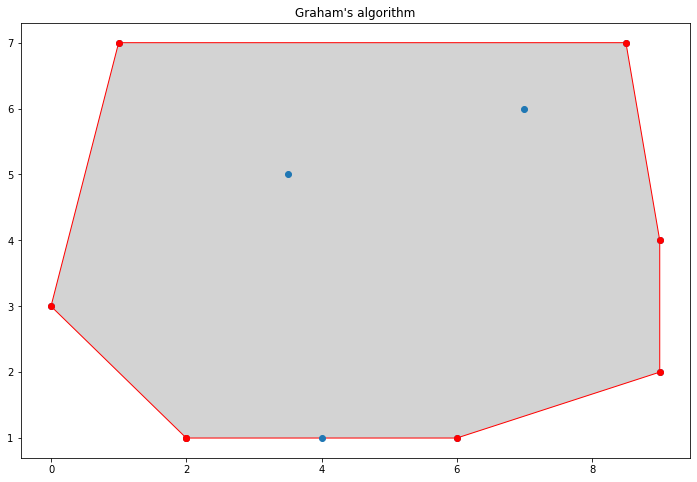

In [105]:
# Graham algorithm
def graham(P):
    # Sort by y-coord then x-coord
    P = P[P[:,0].argsort()]
    P = P[P[:,1].argsort(kind='mergesort')]
    # Get the first point
    p0 = P[0,:]
    
    # Order points by polar angle with p0, if multiple points have same polar angle then keep only the farthest
    angles = {}
    for p in P:
        angle = round(oriented_angle_from_zero((1,0), p-p0), 2)
        if angle not in angles:
            angles[angle] = p
        elif np.linalg.norm(angles[angle]-p0) < np.linalg.norm(p-p0):
            angles[angle] = p
    
    sorted_keys = sorted(list(angles))
    sorted_values = [angles[k] for k in sorted_keys]
    
    stack = []
    for p in sorted_values:
        while len(stack) > 1 and direction(stack[-2], stack[-1], p) <= 0:
            stack.pop()
        stack.append(p)
    
    
    stack.insert(0,p0)
    stack.append(p0)
    return stack

pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])
#graham(pl)

def draw_hull(pl, ax):    
    hull = np.array(graham(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.scatter(hull[:,0], hull[:,1], color='red', zorder=12)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightgray', edgecolor = 'red', linewidth = 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Graham's algorithm")
draw_hull(pl, ax)

def gen_example_and_run_alg(n):
    rng = np.random.default_rng()
    pl = rng.uniform(0.0, n, (n,2))
    hull = graham(pl)

time_graham_10 = timeit.timeit(lambda: gen_example_and_run_alg(10), number=10)
time_graham_100 = timeit.timeit(lambda: gen_example_and_run_alg(100), number=10)
time_graham_1000 = timeit.timeit(lambda: gen_example_and_run_alg(1000), number=10)

print('time graham 10 pts: ', str(time_graham_10))
print('time graham 100 pts: ', str(time_graham_100))
print('time graham 1000 pts: ', str(time_graham_1000))

time jarvis 10 pts:  0.017150100000435486
time jarvis 100 pts:  0.33092609999948763
time jarvis 1000 pts:  4.919286899999861


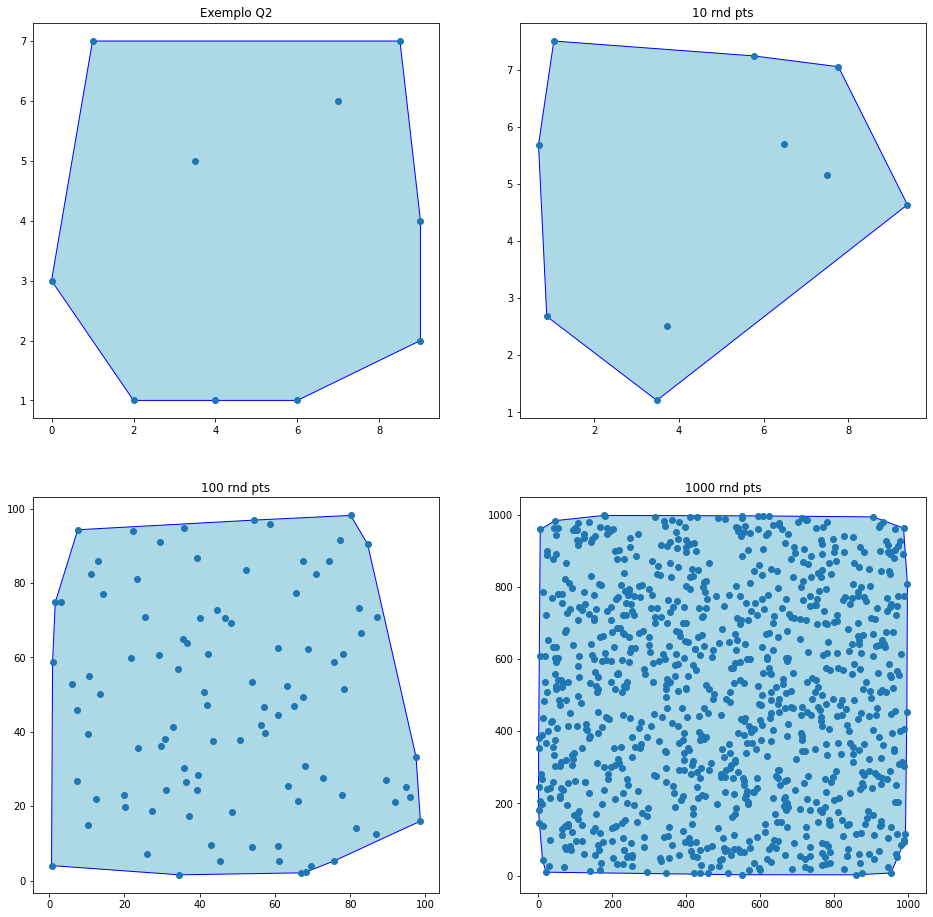

In [106]:
# Jarvis algorithm
def prox(p0, v, P):
    min_angl = 1000000
    min_p = None
    min_i = -1
    for i in range(len(P)):
        p = P[i,:]
        if not np.allclose(p, p0):
            p0p = p - p0
            angle = oriented_angle_from_zero(v, p0p)
            if angle < min_angl:
                min_angl = angle
                min_p = p
                min_i = i
    return min_p, min_i
            

def jarvis(P):
    # Sort by y-coord then x-coord
    P = P[P[:,0].argsort()]
    P = P[P[:,1].argsort(kind='mergesort')]
    # Get the first point
    p0 = P[0,:]
    p1,i1 = prox(p0, (1,0), P)
    hull = [p0, p1]
    
    i = 1
    while not np.allclose(hull[i], p0):
        p_n, i_n = prox(hull[i], hull[i] - hull[i-1], P)
        hull.append(p_n)
        i += 1
        
    return hull


def draw_hull(pl, ax):    
    hull = np.array(jarvis(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)
    
    
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
draw_hull(pl, ax)

ax.set_title('Exemplo Q2')

rng = np.random.default_rng()
pl2 = rng.uniform(0.0, 10.0, (10,2))

draw_hull(pl2, ax2)
ax2.set_title('10 rnd pts')

pl3 = rng.uniform(0.0, 100.0, (100,2))

draw_hull(pl3, ax3)
ax3.set_title('100 rnd pts')

pl4 = rng.uniform(0.0, 1000.0, (1000,2))

draw_hull(pl4, ax4)
ax4.set_title('1000 rnd pts')

def gen_example_and_run_alg(alg, n):
    rng = np.random.default_rng()
    pl = rng.uniform(0.0, n, (n,2))
    hull = alg(pl)

jarvis_l = lambda p: jarvis(p)
time_10 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 10), number=10)
time_100 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 100), number=10)
time_1000 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 1000), number=10)

print('time jarvis 10 pts: ', str(time_10))
print('time jarvis 100 pts: ', str(time_100))
print('time jarvis 1000 pts: ', str(time_1000))

time 10 pts:  0.020073300000149175
time 100 pts:  0.14000529999975697
time 1000 pts:  1.0494761999998445


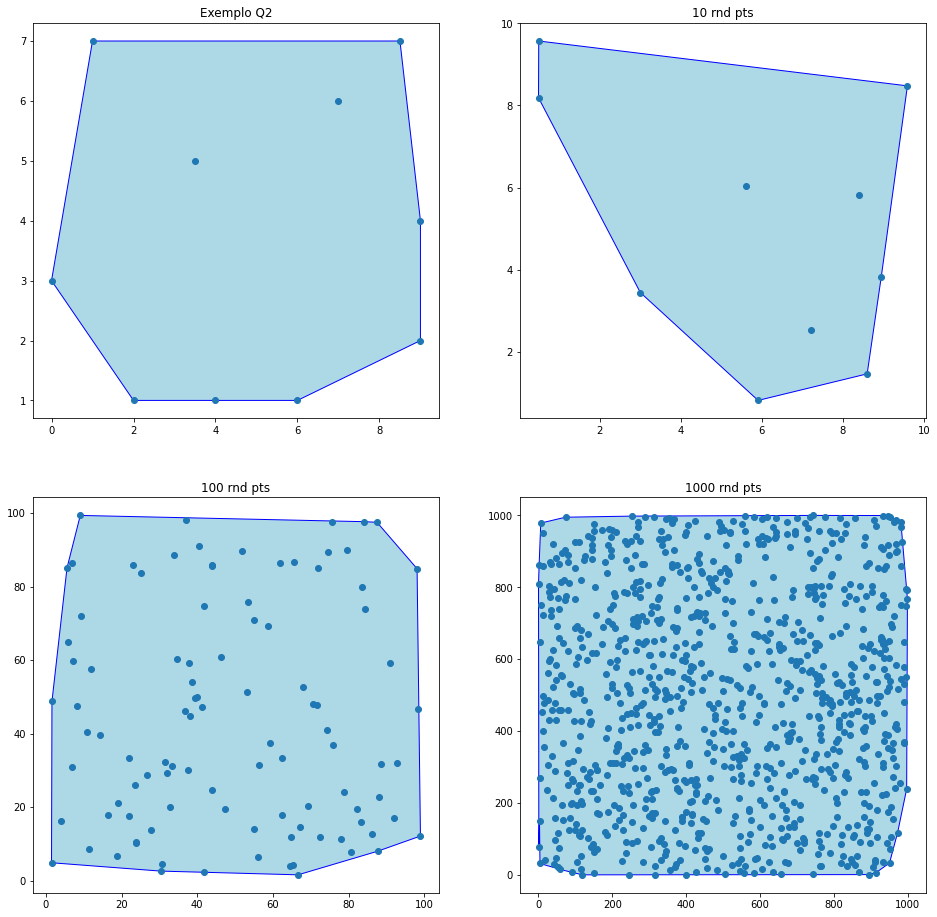

In [107]:
# Quickhull

# returns the distance from point p3 to line formed by p1,p2
def point_line_dist(p1, p2, p3):
    return np.cross(p2-p1, p3-p1)/np.linalg.norm(p2-p1)

def quickhull(P):
    hull = []
    # index of pts with min and max x coords
    min_x = 0
    max_x = 0
    
    for i in range(1,len(P)):
        p = P[i]
        if p[0] < P[min_x][0]:
            min_x = i
        elif p[0] == P[min_x][0] and p[1] < P[min_x][1]:
            min_x = i
        
        if p[0] > P[max_x][0]:
            max_x = i
        elif p[0] == P[max_x][0] and p[1] > P[max_x][1]:
            max_x = i
        
    # we have a line between P[min_x] and P[max_x] that divides the points
    # into S1 and S2
    pmin = P[min_x]
    pmax = P[max_x]
    
    hull.append(pmin)
    hull.append(pmax)
    
    S1 = []
    S2 = []
    for p in P:
        if not np.allclose(p, pmin) or np.allclose(p, pmax):
            d = direction(pmin, pmax, p) 
            if d < 0:
                S1.append(p)
            elif d > 0:
                S2.append(p)
    
    findhull(S1, pmin, pmax, hull)
    findhull(S2, pmax, pmin, hull)
    
    return hull

def findhull(S, p, q, C):
    if len(S) == 0:
        return
    
    # Find farthest point on S from the segment pq
    max_dist = point_line_dist(p, q, S[0])
    max_i = 0
    for i in range(1, len(S)):
        dist = math.fabs(point_line_dist(p, q, S[i]))
        if dist > max_dist:
            max_dist = dist
            max_i = i
    
    # add point to hull between p and q
    pi = -1
    qi = -1
    for (i, c) in enumerate(C):
        if np.allclose(c, p):
            pi = i
        if np.allclose(c, q):
            qi = i
    
    c = S[max_i]
    C.insert(pi+1, c)

    S1 = []
    S2 = []
    for t in S:
        if not np.allclose(p, t) or np.allclose(q, t) or np.allclose(c, t):
            d = direction(p, c, t) 
            if d < 0:
                S1.append(t)
            else:
                d2 = direction(c, q, t)
                if d2 < 0:
                    S2.append(t)
    
    findhull(S1, p, c, C)
    findhull(S2, c, q, C)

    
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])
#quickhull(pl)

def draw_hull(pl, ax):    
    hull = np.array(quickhull(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
draw_hull(pl, ax)

ax.set_title('Exemplo Q2')

rng = np.random.default_rng()
pl2 = rng.uniform(0.0, 10.0, (10,2))

draw_hull(pl2, ax2)
ax2.set_title('10 rnd pts')

pl3 = rng.uniform(0.0, 100.0, (100,2))

draw_hull(pl3, ax3)
ax3.set_title('100 rnd pts')

pl4 = rng.uniform(0.0, 1000.0, (1000,2))

draw_hull(pl4, ax4)
ax4.set_title('1000 rnd pts')

l = lambda p: quickhull(p)
time_10 = timeit.timeit(lambda: gen_example_and_run_alg(l, 10), number=10)
time_100 = timeit.timeit(lambda: gen_example_and_run_alg(l, 100), number=10)
time_1000 = timeit.timeit(lambda: gen_example_and_run_alg(l, 1000), number=10)

print('time 10 pts: ', str(time_10))
print('time 100 pts: ', str(time_100))
print('time 1000 pts: ', str(time_1000))

time merge 10 pts:  0.014102499999353313
time merge 100 pts:  0.1188640000000305
time merge 1000 pts:  1.2904290999995283


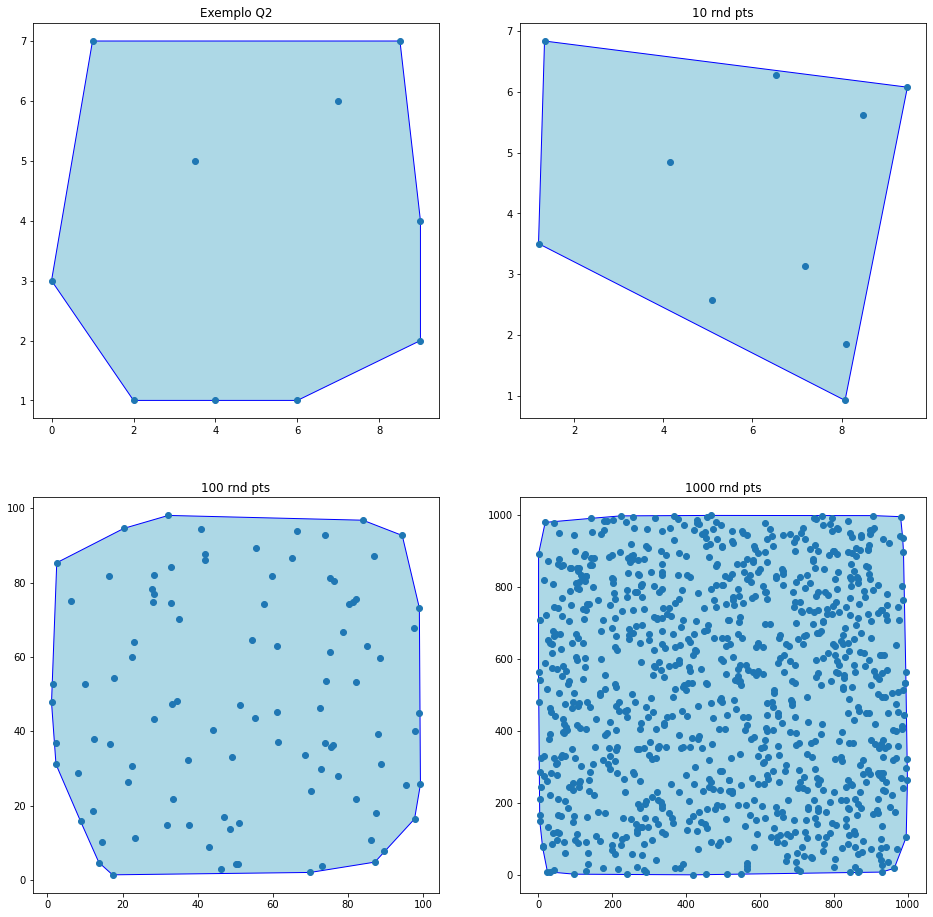

In [108]:
# Mergehull

BASE_CASE_SIZE = 5

def get_next(i, L):
    if i == len(L)-1:
        return 0
    return i+1

def get_prev(i, L):
    if i == 0:
        return len(L)-1
    return i-1

# Receives two hulls in CCW order
def merge(left, right):
    # Remove the last point that closed the polygon
    left.pop()
    right.pop()
    hull = []
    left_i = 0 #index of leftmost point on left hull
    for i in range(1, len(left)):
        if left[i][0] > left[left_i][0]:
            left_i = i
    right_i = 0 #index of rightmost point on right hull
    for i in range(1, len(right)):
        if right[i][0] < right[right_i][0]:
            right_i = i
    
    p = left_i
    q = right_i
    
    prev_p = None
    prev_q = None
    
    # find upper tangent
    while True:
        prev_p = p
        prev_q = q
        while True:  
            di = direction(right[q], left[p], left[get_next(p, left)])
            if di > 0: # continue while direction is not counter-clockwise
                break
            p = get_next(p, left)
            
        while True:
            di = direction(left[p], right[q], right[get_prev(q, right)])
            if di < 0: # continue while direction is not clockwise
                break
            q = get_prev(q, right)
                
        if p == prev_p and q == prev_q:
            break
    
    # find lower tangent
    cp = left_i
    cq = right_i
    
    while True:
        prev_p = cp
        prev_q = cq
        while True:
            di = direction(right[cq], left[cp], left[get_prev(cp, left)])
            if di < 0: # continue while direction is not clockwise
                break
            cp = get_prev(cp, left)
        
        while True:
            di = direction(left[cp], right[cq], right[get_next(cq, right)])
            if di > 0: # continue while direction is not counter-clockwise
                break
            cq = get_next(cq, right)
        
        if cp == prev_p and cq == prev_q:
            break
            
    #print(f'lower tangent is {left[cp]} {right[cq]}')
    
    # New hull is [p, cp] union [cq, q]
    if cp < p:
        hull.extend(left[p:])
        hull.extend(left[:cp+1])
    else:
        hull.extend(left[p:cp+1])
    
    if q < cq:
        hull.extend(right[cq:])
        hull.extend(right[:q+1])
    else:
        hull.extend(right[cq:q+1])
    
    # Close the hull
    hull.append(hull[0])
    
    return hull

def mergehull(P):
    # sort by x-coord
    P = P[P[:,0].argsort()]
    return mergehull_rec(P)

def mergehull_rec(P):
    n = len(P)
    # Base case
    if n <= BASE_CASE_SIZE:
        hull = jarvis(P)
        return hull
    mid = math.floor(n/2)
    left_hull = mergehull_rec(P[:mid,:])
    right_hull = mergehull_rec(P[mid:,:])
    hull = merge(left_hull, right_hull)
    return hull
        
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])
#hull = mergehull(pl)

def draw_hull(pl, ax):    
    hull = np.array(mergehull(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
draw_hull(pl, ax)

ax.set_title('Exemplo Q2')

rng = np.random.default_rng()
pl2 = rng.uniform(0.0, 10.0, (10,2))

draw_hull(pl2, ax2)
ax2.set_title('10 rnd pts')

pl3 = rng.uniform(0.0, 100.0, (100,2))

draw_hull(pl3, ax3)
ax3.set_title('100 rnd pts')

pl4 = rng.uniform(0.0, 1000.0, (1000,2))

draw_hull(pl4, ax4)
ax4.set_title('1000 rnd pts')

def gen_example_and_run_alg(alg, n):
    rng = np.random.default_rng()
    pl = rng.uniform(0.0, n, (n,2))
    hull = alg(pl)

merge_l = lambda p: mergehull(p)
time_10 = timeit.timeit(lambda: gen_example_and_run_alg(merge_l, 10), number=10)
time_100 = timeit.timeit(lambda: gen_example_and_run_alg(merge_l, 100), number=10)
time_1000 = timeit.timeit(lambda: gen_example_and_run_alg(merge_l, 1000), number=10)

print('time merge 10 pts: ', str(time_10))
print('time merge 100 pts: ', str(time_100))
print('time merge 1000 pts: ', str(time_1000))
#print('hull: ', hull)

In [111]:
# Embrulho

pl = np.array([[0,0,-5],[2,0,0],[0,3,0],[0,-5,0],[-5,0,0],[0,5,0]])
pl2 = np.array([[0,1,0], [-1,0,0], [1,0,0], [0,0,0.5]])
cols = np.array([[1,0,0], [0,1,0], [0,0,1], [1,1,0], [1,0,1], [0,1,1]])
    
def embrulho(F, p1, p2, P):
    min_cos = 10000000
    min_p = None
    n = np.cross(F[1]-F[0], F[2]-F[0])
    for p in P:
        if not np.allclose(p, F[0]) and not np.allclose(p, F[1]) and not np.allclose(p, F[2]):
            fp = np.cross(p-p1, p1-p2)
            cosp = np.dot(fp, n)/(np.linalg.norm(fp)*np.linalg.norm(n))
            print(f'\t\tcosine with point {p} is {cosp}')
            if cosp < min_cos:
                min_cos = cosp
                min_p = p
    print(f'\tpoint with min cosine is {min_p}')
    
    return min_p
    
from collections import deque

def get_face_exists(p1, p2, H):
    for f in H:
        if np.allclose(p1, f["points"][0]) and np.allclose(p2, f["points"][1]):
            return f, 0
        if np.allclose(p2, f["points"][0]) and np.allclose(p1, f["points"][1]):
            return f, 0
        if np.allclose(p1, f["points"][1]) and np.allclose(p2, f["points"][2]):
            return f, 1
        if np.allclose(p2, f["points"][1]) and np.allclose(p1, f["points"][2]):
            return f, 1
        if np.allclose(p1, f["points"][2]) and np.allclose(p2, f["points"][0]):
            return f, 2
        if np.allclose(p1, f["points"][2]) and np.allclose(p2, f["points"][0]):
            return f, 2
    return None, None
    

def embrulhohull(P, F):
    faces = deque([{"points": F, "livres": [0,1,2]}])
    hull = [faces[0]]
    
    while len(faces) > 0:
        work_face = faces.popleft()
        print(f'current working face: {work_face["points"]}')
        while len(work_face["livres"]) > 0:
            free_edge = work_face["livres"].pop()
            p1 = F[free_edge]
            p2 = F[get_next(free_edge, work_face["points"])]
            print(f'\tlook at free edge {p1} {p2}')
    
            p3 = embrulho(work_face["points"], p1, p2, P)
            
            new_face = {"points": np.array([p1, p2, p3]), "livres": []}
        
            existing_face, existing_face_edge = get_face_exists(p2, p3, hull)
            if existing_face is None:
                new_face["livres"].append(1)
            else:
                if existing_face_edge in existing_face["livres"]:
                    existing_face["livres"].remove(existing_face_edge)
            
            existing_face, existing_face_edge = get_face_exists(p3, p1, hull)
            if existing_face is None:
                new_face["livres"].append(2)
            else:
                if existing_face_edge in existing_face["livres"]:
                    existing_face["livres"].remove(existing_face_edge)
                
            faces.append(new_face)
            hull.append(new_face)
            print(f'\tcreate face {new_face["points"]}')
    
    return hull

hull = embrulhohull(pl, np.array([[0,0,-5], [0,5,0], [-5,0,0]]))

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(14, 9))
#ax = plt.axes(projection ='3d')

faces = []
for face in hull:
    faces.append(face["points"][0])
    faces.append(face["points"][1])
    faces.append(face["points"][2])
    

faces = np.array(faces)
triangles = np.array([[i, i+1, i+2] for i in range(0, len(faces), 3)])

current working face: [[ 0  0 -5]
 [ 0  5  0]
 [-5  0  0]]
	look at free edge [-5  0  0] [ 0  0 -5]
		cosine with point [2 0 0] is 0.5773502691896258
		cosine with point [0 3 0] is 0.9684959969581862
		cosine with point [ 0 -5  0] is -0.3333333333333333
	point with min cosine is [ 0 -5  0]
	create face [[-5  0  0]
 [ 0  0 -5]
 [ 0 -5  0]]
	look at free edge [0 5 0] [-5  0  0]
		cosine with point [2 0 0] is 0.5773502691896258
		cosine with point [0 3 0] is 0.5773502691896258
		cosine with point [ 0 -5  0] is 0.5773502691896257
	point with min cosine is [ 0 -5  0]
	create face [[ 0  5  0]
 [-5  0  0]
 [ 0 -5  0]]
	look at free edge [ 0  0 -5] [0 5 0]
		cosine with point [2 0 0] is 0.10050378152592122
		cosine with point [0 3 0] is 0.5773502691896258
		cosine with point [ 0 -5  0] is 0.5773502691896257
	point with min cosine is [2 0 0]
	create face [[ 0  0 -5]
 [ 0  5  0]
 [ 2  0  0]]
current working face: [[-5  0  0]
 [ 0  0 -5]
 [ 0 -5  0]]
	look at free edge [-5  0  0] [ 0  0 -5]
		cos

C:\Users\mesquita\AppData\Local\Temp/ipykernel_19136/3036271389.py:14: RuntimeWarning: invalid value encountered in true_divide
  cosp = np.dot(fp, n)/(np.linalg.norm(fp)*np.linalg.norm(n))
